In [110]:
from root_pandas import read_root
import pdg
import matplotlib.pyplot as plt
from PyFastBDT import FastBDT
import numpy as np
import pandas as pd

plt.rc('font', size=12)

In [2]:
data = read_root('../mc/exp55_run50_balance.root', 'lambda')

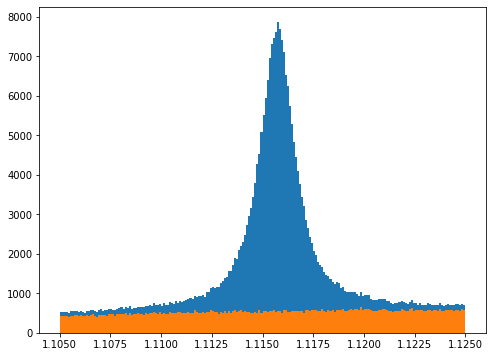

In [3]:
plt.figure(figsize = (8, 6))
plt.hist(data.M, range = [1.105, 1.125], bins = 200)
plt.hist(data[data.isSignal == 0].M, range = [1.105, 1.125], bins = 200)
plt.show()

In [4]:
data.shape

(436969, 39)

In [5]:
sum(data.isSignal == 1)

224402

In [6]:
data.columns

Index(['__experiment__', '__run__', '__event__', '__candidate__',
       '__ncandidates__', '__weight__', 'M', 'p', 'chiProb', 'cosa', 'cosaXY',
       'dr', 'dz', 'distance', 'significanceOfDistance', 'min_dr', 'min_dz',
       'goodBelleLambda', 'isSignal', 'genMotherPDG', 'IPX', 'IPY', 'IPZ',
       'p_pid_ppi', 'p_pid_pk', 'p_pid_kpi', 'p_dr', 'p_dz', 'p_p',
       'p_isSignal', 'p_genMotherPDG', 'pi_pid_ppi', 'pi_pid_pk', 'pi_pid_kpi',
       'pi_dr', 'pi_dz', 'pi_p', 'pi_isSignal', 'pi_genMotherPDG'],
      dtype='object')

In [16]:
features = [
    'p',
    'chiProb',
    'cosa',
    'cosaXY',
    'dr',
    'dz',
    'distance',
    'significanceOfDistance',
    'min_dr',
    'min_dz',
    'p_pid_ppi',
    'p_pid_pk',
    'p_pid_kpi',
    'p_p',
    'pi_pid_ppi',
    'pi_pid_pk',
    'pi_pid_kpi',
    'pi_p',
]

In [9]:
data = data.sample(frac=1) # shuffle the data

In [10]:
data_size = len(data)

In [11]:
train_size = int(data_size * 0.8)

In [165]:
train = data[:train_size]
validation = data[train_size:]

In [166]:
train.to_root('../mc/train.root', 'lambda')

In [168]:
validation.to_root('../mc/validation.root', 'lambda')

In [13]:
len(train), len(validation)

(349575, 87394)

In [169]:
clf = FastBDT.Classifier(nTrees=200, depth=3)
clf.fit(train[features], train.isSignal)

In [170]:
train['mva'] = clf.predict(train[features])

/cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [171]:
validation['mva'] = clf.predict(validation[features])

/cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
from sklearn.metrics import roc_auc_score

In [125]:
for df, name in zip([train, validation], ['train', 'validation']):
    print(f'{name} auc \t= {roc_auc_score(df.isSignal, df.mva)}')

train auc 	= 0.9963202653808383
validation auc 	= 0.9957646402777078


In [126]:
data[features].corr()

,p,chiProb,cosa,cosaXY,dr,dz,distance,significanceOfDistance,min_dr,min_dz,p_pid_ppi,p_pid_pk,p_pid_kpi,p_p,pi_pid_ppi,pi_pid_pk,pi_pid_kpi,pi_p
p,1.000000,-0.000930,0.002380,-0.000635,0.054116,0.054952,0.092603,0.083679,0.004258,-0.003164,0.000165,-0.000048,0.001519,0.007543,-0.000135,0.000337,0.000205,0.006554
chiProb,-0.000930,1.000000,0.356385,0.331979,-0.090964,-0.042486,-0.119941,-0.168310,-0.236573,0.115834,0.393132,0.403795,0.343237,0.295706,-0.090101,-0.076408,-0.091511,0.240740
cosa,0.002380,0.356385,1.000000,0.889872,-0.062047,0.055720,-0.091779,-0.058194,-0.102286,0.213708,0.538309,0.549004,0.443508,0.329323,-0.087596,-0.071913,-0.078869,0.252306
cosaXY,-0.000635,0.331979,0.889872,1.000000,-0.056441,0.044107,-0.077032,-0.027375,-0.081685,0.180868,0.505083,0.513671,0.418447,0.313477,-0.077553,-0.065122,-0.067860,0.235459
dr,0.054116,-0.090964,-0.062047,-0.056441,1.000000,0.083095,0.917262,0.590536,0.225710,-0.036663,-0.087295,-0.090619,-0.068074,-0.047055,0.016225,0.017395,0.016392,-0.029522
dz,0.054952,-0.042486,0.055720,0.044107,0.083095,1.000000,-0.102104,-0.051546,0.136911,0.442873,-0.033317,-0.037681,-0.031364,-0.022028,0.004851,0.007448,0.007627,-0.005507
distance,0.092603,-0.119941,-0.091779,-0.077032,0.917262,-0.102104,1.000000,0.738298,0.266818,-0.028583,-0.112904,-0.118498,-0.087369,-0.047142,0.026183,0.027483,0.028014,-0.023085
significanceOfDistance,0.083679,-0.168310,-0.058194,-0.027375,0.590536,-0.051546,0.738298,1.000000,0.496877,-0.022275,-0.133406,-0.140881,-0.095325,-0.065579,0.033901,0.036449,0.035207,-0.051471
min_dr,0.004258,-0.236573,-0.102286,-0.081685,0.225710,0.136911,0.266818,0.496877,1.000000,0.028831,-0.202320,-0.215819,-0.138999,-0.080830,0.052971,0.049497,0.059551,-0.046036
min_dz,-0.003164,0.115834,0.213708,0.180868,-0.036663,0.442873,-0.028583,-0.022275,0.028831,1.000000,0.118118,0.119074,0.089977,0.073909,-0.029998,-0.026503,-0.023597,0.056752


In [141]:
import seaborn as sns

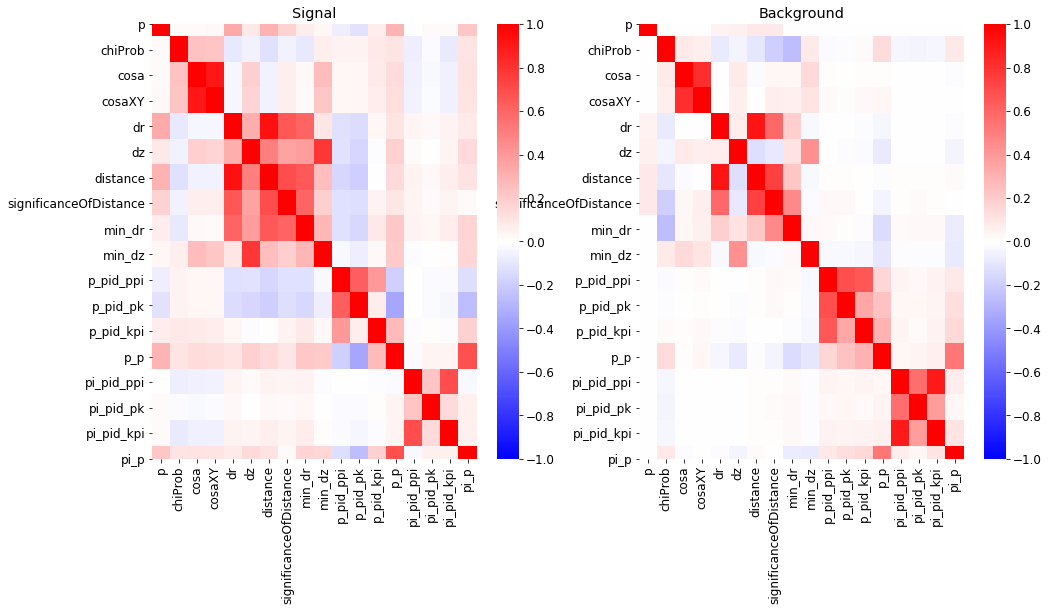

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
for ax, df, title in zip(axes, 
                         [data[data.isSignal==1], data[data.isSignal==0]],
                         ['Signal', 'Background']):
    sns.heatmap(df[features].corr(), cmap='bwr', vmin=-1, vmax=1, ax=ax)
    ax.set_title(title)
    cbar = ax.collections[0].colorbar
    cbar.set_ticks(np.arange(-1, 1.1, 0.2))

In [143]:
plt.tight_layout()
fig.savefig('correlation_all.pdf')

<Figure size 432x288 with 0 Axes>

In [129]:
intern_importance = clf.internFeatureImportance()

In [130]:
df_importance = pd.DataFrame(intern_importance.items(), columns=['variable', 'intern'])

In [131]:
df_importance.variable = features

In [132]:
df_importance = df_importance.sort_values(by='intern')

In [133]:
df_importance

,variable,intern
16,pi_pid_kpi,0.000354
9,min_dz,0.000500
5,dz,0.000691
17,pi_p,0.000753
0,p,0.001025
14,pi_pid_ppi,0.001180
12,p_pid_kpi,0.003939
8,min_dr,0.004005
15,pi_pid_pk,0.004366
13,p_p,0.004813


In [134]:
clf.nTrees

200

In [135]:
clf.depth

3

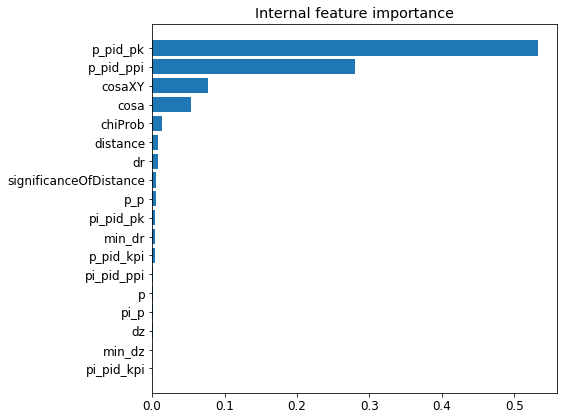

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.barh(range(len(df_importance)), df_importance.intern,
      tick_label=df_importance.variable)
ax.set_title('Internal feature importance')
plt.tight_layout()

In [140]:
fig.savefig('intern_feature_importance_all.pdf')

In [154]:
def train_and_evaluate(train, validation, features, nTrees=200, depth=3):
    clf = FastBDT.Classifier(nTrees=nTrees, depth=depth)
    clf.fit(train[features], train.isSignal)
    train['mva'] = clf.predict(train[features])
    validation['mva'] = clf.predict(validation[features])
    train_auc = roc_auc_score(train.isSignal, train.mva)
    validation_auc = roc_auc_score(validation.isSignal, validation.mva)
    return (train_auc, validation_auc)

In [155]:
train_and_evaluate(train, validation, features)

/cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(0.9963041744174422, 0.9957556010761417)

In [164]:
train_and_evaluate(train, validation, ['p_pid_pk', 'p_pid_ppi', 'cosaXY', 'chiProb', 'dr'], nTrees=800, depth=3)

/cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/cvmfs/belle.cern.ch/sl6/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(0.9959951031458758, 0.9950646520483061)

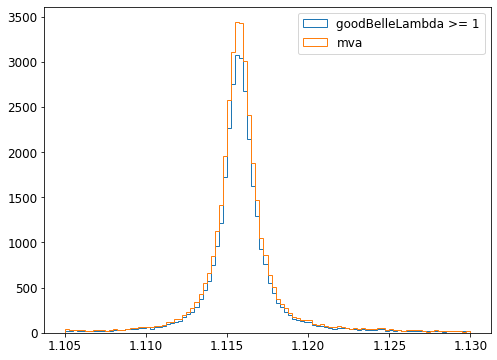

In [190]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(validation.query('goodBelleLambda >= 1 and p_pid_pk > 0.6 and p_pid_ppi > 0.6').M,
        bins=100, range=[1.105, 1.13], histtype='step',
        label='goodBelleLambda >= 1');
ax.hist(validation.query('mva > 0.96').M,
        bins=100, range=[1.105, 1.13], histtype='step',
        label='mva');

plt.legend()

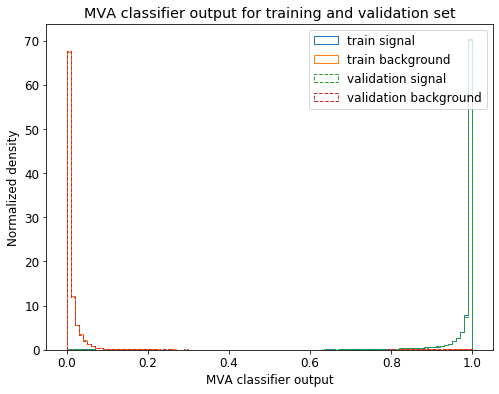

In [207]:
fig = plt.figure(figsize=(8, 6))
plt.hist(train[train.isSignal == 1].mva, bins=100, histtype='step', density=True, label='train signal')
plt.hist(train[train.isSignal == 0].mva, bins=100, histtype='step', density=True, label='train background')
plt.hist(validation[validation.isSignal == 1].mva, bins=100, histtype='step', linestyle='--', density=True, label='validation signal')
plt.hist(validation[validation.isSignal == 0].mva, bins=100, histtype='step', linestyle='--', density=True, label='validation background')
plt.title('MVA classifier output for training and validation set')
plt.legend()
plt.ylabel('Normalized density')
plt.xlabel('MVA classifier output')
plt.show()

In [208]:
fig.savefig('mva_output_dist.pdf')

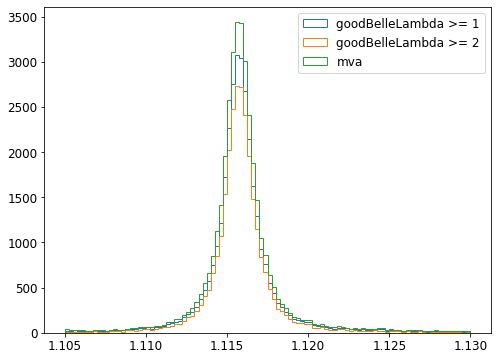

In [210]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(validation.query('goodBelleLambda >= 1 and p_pid_pk > 0.6 and p_pid_ppi > 0.6').M,
        bins=100, range=[1.105, 1.13], histtype='step',
        label='goodBelleLambda >= 1');

ax.hist(validation.query('goodBelleLambda >= 2 and p_pid_pk > 0.6 and p_pid_ppi > 0.6').M,
        bins=100, range=[1.105, 1.13], histtype='step',
        label='goodBelleLambda >= 2');

ax.hist(validation.query('mva > 0.96').M,
        bins=100, range=[1.105, 1.13], histtype='step',
        label='mva');

plt.legend()